In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
sns.set()
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
pd.options.display.max_rows = 16

In [3]:
canada = pd.read_csv('canada.csv')

In [4]:
#canada.info()

In [5]:
redundant_columns = ['prname','prnameFR']
canada.drop(redundant_columns, axis=1, inplace=True)

In [6]:
canada.head()

,pruid,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,2020-01-31,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,2020-01-31,NaN,1,0.0,0.0,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,2020-01-31,NaN,4,0.0,0.0,4,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,2020-02-08,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,2020-02-08,NaN,4,0.0,0.0,4,NaN,63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
canada['date'] = pd.to_datetime(canada['date'])
canada["date"] = pd.to_datetime(canada["date"]).dt.strftime("%Y%m%d")

In [8]:
#
# Perform one-hot encoding
#
#categorical_columns = canada.columns[canada.dtypes == object] 
# Find all categorical columns
#canada = pd.get_dummies(canada, columns = categorical_columns, drop_first=True)

In [9]:
canada.head()

,pruid,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,20200131,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,20200131,NaN,1,0.0,0.0,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,20200131,NaN,4,0.0,0.0,4,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,20200208,NaN,3,0.0,0.0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,20200208,NaN,4,0.0,0.0,4,NaN,63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
canada.fillna(value=0, inplace=True)

## Standardizing the dataset
## Constructing the covariance matrix
## Performing Eigendecomposition of covariance matrix
## Selection of most important Eigenvectors / Eigenvalues
## Projection matrix creation of important eigenvectors
   #### Sorting the eigenvalues by decreasing order to rank the corresponding eigenvectors. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (). One can used the concepts of explained variance to select the k most important eigenvectors.
## Training / test dataset transformation

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(canada)

In [12]:
X.shape

(8922, 38)

In [13]:
from numpy.linalg import eigh

In [14]:
#
# Determine covariance matrix
#
cov_matrix = np.cov(X, rowvar=False)

Text(0.5, 1.0, 'Correlation between different features')

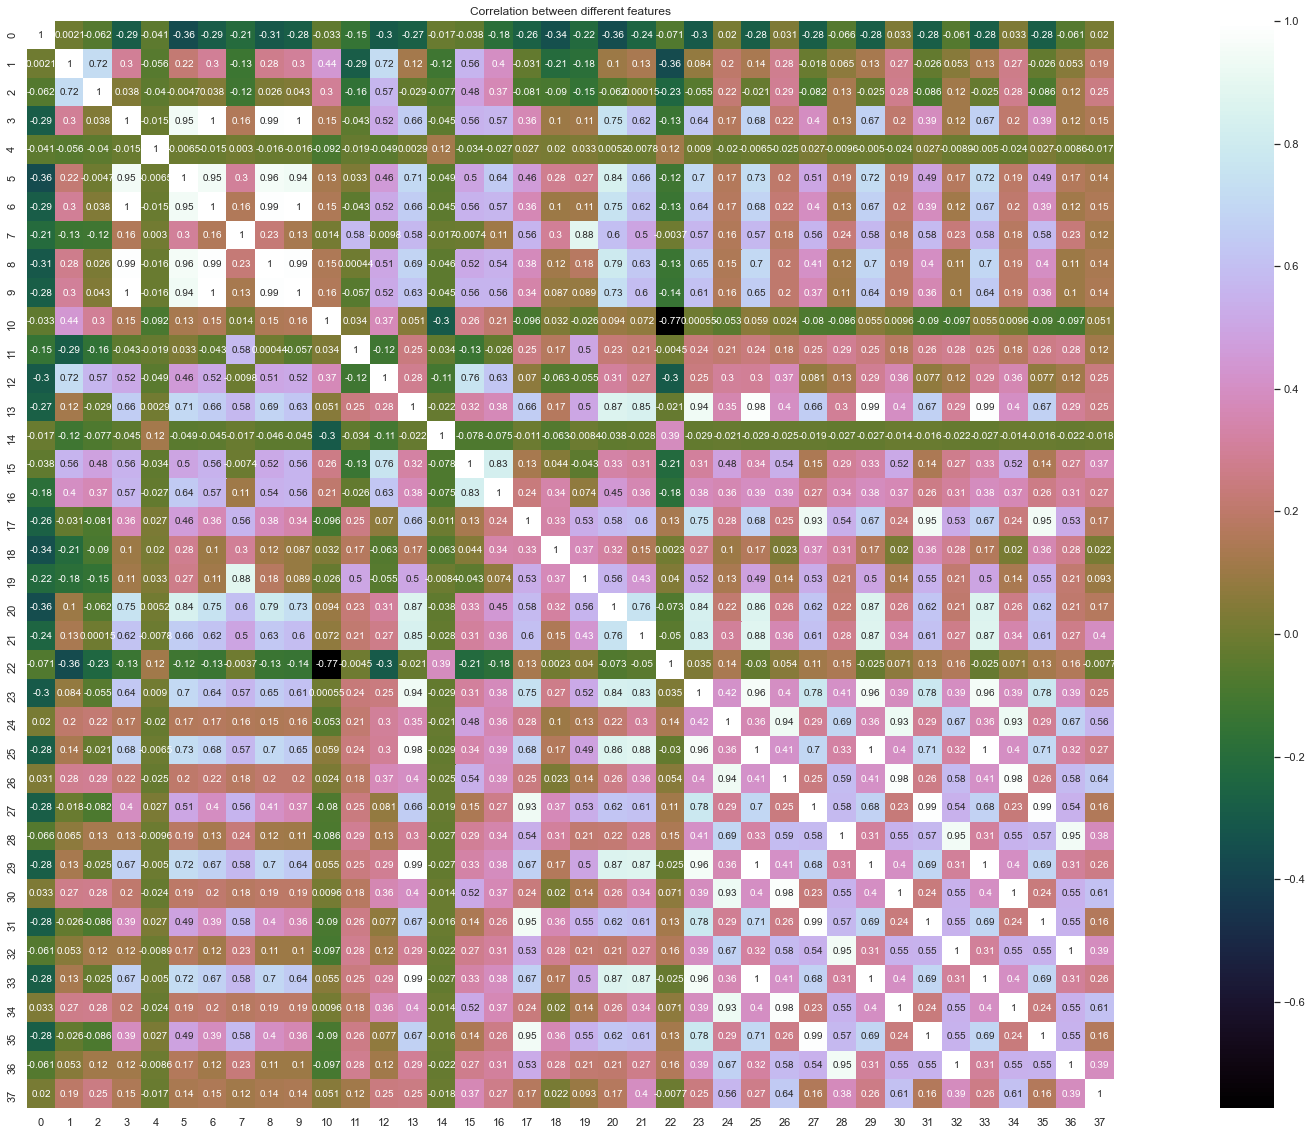

In [15]:
plt.figure(figsize=(38,20))
sns.heatmap(cov_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [22]:
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)

In [23]:
#
# Determine explained variance and select the most important eigenvectors based on explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

Explained variance  [0.38731311390226425, 0.1336705846806664, 0.13190015558997603, 0.05646120959389789, 0.051822828782265414, 0.03530682408254925, 0.03321604182722816, 0.024965600622779967, 0.021445623577338487, 0.02095167070690937, 0.018153366192520014, 0.015840889215149038, 0.013468704208494525, 0.011445453219154206, 0.0088555618487782, 0.006005190288564355, 0.005158202804019031, 0.004278811854585307, 0.003978337772338769, 0.003017683393233499, 0.002771539538389557, 0.002487600099989991, 0.0021919247868810417, 0.001813377385816017, 0.0014551892221138043, 0.000577733754179154, 0.0005320137234118757, 0.00034603031144091293, 0.00020161150368933295, 0.00019270273455169947, 0.00011798052802780497, 5.284179706499162e-05, 2.210010375706968e-06, 1.3881508252653506e-06, 1.0074595315386502e-09, 7.868981476047916e-10, 4.960265882637217e-10, 1.4641080803065461e-13]
Cumulative variance  [0.38731311 0.5209837  0.65288385 0.70934506 0.76116789 0.79647472
 0.82969076 0.85465636 0.87610198 0.89705365

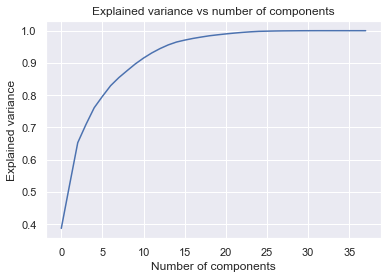

(38, 2)


In [24]:
# Get explained variance
sum_eig_val = np.sum(egnvalues)
explained_variance = var_exp
print("Explained variance ", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance ", cumulative_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

## We will 2 components
n_comp = 2
eig_vec = egnvectors[:,:n_comp]
print(eig_vec.shape)


In [26]:
#
# Construct projection matrix using the five eigenvectors that correspond to the top six eigenvalues (largest),
#to capture about 80% of the variance in this dataset
#
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis],
                              egnpairs[5][1][:, np.newaxis]))

In [27]:
#
# Transform the training data set
#
X_train_pca = X.dot(projectionMatrix)

In [28]:
# Create the dataframe
pca_data = pd.DataFrame(X_train_pca)

In [29]:
pca_data.head()

,0,1,2,3,4,5
0,2.783591,-3.079458,-2.008746,-11.127414,-0.450299,-0.473483
1,2.649522,-2.159759,-1.519182,-6.079680,-0.142211,-0.507256
2,2.779946,-3.516437,-2.345911,-13.597676,-0.744180,-0.243953
3,2.465815,-1.658510,-1.422480,-3.465342,-0.217715,-0.181356
4,2.859670,-3.100447,-1.904746,-11.183162,-0.298465,-0.710584


In [30]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(pca_data)
pca_kmeans = pd.DataFrame(pca_data)
pca_kmeans['cluster'] = labels

In [31]:
pca_kmeans.head()

,0,1,2,3,4,5,cluster
0,2.783591,-3.079458,-2.008746,-11.127414,-0.450299,-0.473483,0
1,2.649522,-2.159759,-1.519182,-6.079680,-0.142211,-0.507256,0
2,2.779946,-3.516437,-2.345911,-13.597676,-0.744180,-0.243953,0
3,2.465815,-1.658510,-1.422480,-3.465342,-0.217715,-0.181356,0
4,2.859670,-3.100447,-1.904746,-11.183162,-0.298465,-0.710584,0


In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(pca_data)

In [ ]:
print(tsne_obj)

In [ ]:
pca_tsne = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                           'cluster':labels})

In [ ]:
sns.scatterplot(x="X", y="Y",
              data=pca_tsne,
              hue='cluster',
              legend="full")